In [1]:
from scipy import signal
from skimage.feature import peak_local_max
import numpy as np

In [ ]:
from bokeh.plotting import figure, show, output_notebook, gridplot
from bokeh.palettes import Blues9, Reds3

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import duplicate_audio.wavBasicRead as wbr

In [4]:
# WAV_FILE_PATH = "./resources/4-free-drum-loops-127-bpm/01-drum-loop-127-bpm.wav"
WAV_FILE_PATH = "./resources/4-free-drum-loops-127-bpm/02-drum-loop-127-bpm.wav"

## Read a wav file into a numpy array

In [5]:
wav_dict = wbr.read_single_wav(WAV_FILE_PATH)
wav_dict

{'abs_file_path': '/Users/myrmidon/Delve/studies-mi/mmar/duplicate_audio/resources/4-free-drum-loops-127-bpm/02-drum-loop-127-bpm.wav',
 'data': array([[  0,   0],
        [  0,   0],
        [  0,   0],
        ..., 
        [299, 253],
        [381, 415],
        [  0,   0]], dtype=int16),
 'sampling_frequency': 44100}

In [6]:
wav_dict["n_samples"], wav_dict["n_channels"] = wav_dict["data"].shape
wav_dict

{'abs_file_path': '/Users/myrmidon/Delve/studies-mi/mmar/duplicate_audio/resources/4-free-drum-loops-127-bpm/02-drum-loop-127-bpm.wav',
 'data': array([[  0,   0],
        [  0,   0],
        [  0,   0],
        ..., 
        [299, 253],
        [381, 415],
        [  0,   0]], dtype=int16),
 'n_channels': 2,
 'n_samples': 166678,
 'sampling_frequency': 44100}

### Plotting the amplitude

In [ ]:
# x = np.arange(2001)
# y = [wav_dict["data"][0::wav_dict["n_samples"]//2000, c] for c in range(wav_dict["n_channels"])]

In [ ]:
# output_notebook()

In [ ]:
# pp = []
# for i, yy in enumerate(y):
#     p = figure(title=("Channel :%d")%i, width=250, height=250)
#     p.line(x, yy)
#     pp.append(p)

# ppp = gridplot([pp])
# show(ppp)

## Spectogram

For now, let's stick to the first channel

In [ ]:
[spec_f, spec_t, spec] = signal.spectrogram(wav_dict["data"][:, 0],
                                           fs=wav_dict["sampling_frequency"],
                                           scaling='spectrum')

In [ ]:
plt.plot(spec_t)

In [ ]:
# output_notebook()

# im_data = np.log(spec[:, 0:5000])
# s = figure(title="Spectogram", x_range=(0, im_data.shape[1]), y_range=(0, im_data.shape[0]), webgl=True)
# s.image(image=[im_data], x=[0], y=[0], dw=[im_data.shape[1]], dh=[im_data.shape[0]], palette=Blues9 )

# show(s)

## Find local maxima

In [ ]:
local_max = peak_local_max(spec, min_distance=2, exclude_border=False, threshold_rel=0)

In [ ]:
c = 10
for (x, y) in local_max:
    if c > 0:
        print(x, y)
        c -= 1
    else:
        break

## Define Target Zone

In [ ]:
TGT_HEIGHT_Minus, TGT_HEIGHT_Plus, TGT_WIDTH, TGT_DISP = [-25, 25, 25, 50]

In [ ]:
padding = max([TGT_DISP + TGT_WIDTH, - TGT_HEIGHT_Minus, TGT_HEIGHT_Plus])
print(padding)

In [ ]:
lomx = np.zeros(spec.shape)
lomx[local_max[:, 0], local_max[:, 1]] = 1
lomx.shape

In [ ]:
plt.imshow(lomx*255, cmap=plt.cm.gray)

In [ ]:
plt.plot(np.sum(lomx, axis=1))

In [ ]:
plt.plot(np.sum(lomx, axis=0))

In [ ]:
lomx.shape

In [ ]:
x = np.zeros((2, 3))
x[1, 1] = 1
x[1, 0] = 1
x[0, 0] = 1
a = np.nonzero(x)
print(a)
print()
at = np.transpose(np.nonzero(x))
print(at)
print()
# for (y, x) in a:
#     print("y:", y, "x:", x)
# print()
# for (x, y) in at:
#     print("y:", y, "x:", x)

def fu(y, x):
    print(y, x)
    
vfu = np.vectorize(fu)
vfu(at[:, 0], at[:, 1])

In [ ]:
# Pad with zeros
lomx_p = np.pad(lomx, padding, mode='constant', constant_values=0)
lomx_p.shape

In [ ]:
tgt_Y, tgt_X = np.ogrid[TGT_HEIGHT_Minus : TGT_HEIGHT_Plus, TGT_DISP : TGT_DISP+TGT_WIDTH]

In [ ]:
tgt_Y

In [ ]:
(y, x) = lomx.shape

y, x = y-1, x-1

print(y, x)

padding = max([TGT_DISP + TGT_WIDTH, - TGT_HEIGHT_Minus, TGT_HEIGHT_Plus])
print(padding)
zone_Y = tgt_Y + (y + padding)
zone_X = tgt_X + (x + padding)

print(zone_X.max())

plt.imshow(lomx_p[zone_Y, zone_X], cmap=plt.cm.gray)

In [ ]:
for time in [25]:
    for freq in [lomx_p.shape[0]//2]:
        tgt_Y_zone = tgt_Y + freq
        tgt_X_zone = tgt_X + time
        
        tgt_zone = lomx_p[tgt_Y_zone, tgt_X_zone]
        print(np.transpose(np.nonzero(tgt_zone)).shape)
#         print(tgt_Y_zone)
#         print(tgt_X_zone)
#         plt.figure()
#         plt.imshow(tgt_zone, cmap=plt.cm.gray)
#         tgt_zone_YX = np.meshgrid(tgt_Y_zone, tgt_X_zone, indexing='ij')
#         print(tgt_zone_YX)
#         tgt_zone_2 = lomx_p[tgt_zone_YX]
    
#         print(np.all(tgt_zone == tgt_zone_2))
#         plt.figure()
#         plt.imshow(tgt_zone_2, cmap=plt.cm.gray)
        
        
        

In [ ]:
xx = np.arange(81).reshape(9, 9)
# YY, XX = np.ogrid[0:4, 0:5]
print(xx[YY, XX])
YX = np.meshgrid(YY, XX, indexing='ij')
print(YX)
# print(xx[YX])

****
### Experiment with GLCM

In [ ]:
lmx = np.zeros(spec.shape)
lmx[local_max[:, 0], local_max[:, 1]] = 1

In [ ]:
from skimage.feature import greycomatrix, greycoprops

In [ ]:
glcm = lambda t1, t2: greycomatrix(lmx[:, t1:t2], list(range(25, 51)), [0], levels=2)
res = list(map(glcm, list(range(0,lmx.shape[1],50)), list(range(100,lmx.shape[1],50))))
print(len(res))
print(res[0].shape)

In [ ]:
colors = [['r', 'g'], ['b', 'y']]
for k in range(len(res)):
    for i in range(2):
        for j in range(2):
            if i == j == 0:
                continue
            plt.plot(res[k][i, j, :, 0], colors[i][j])

In [ ]:
colors = [['r', 'g'], ['b', 'y']]
for k in range(len(res)):
    for i in range(2):
        for j in range(2):
            if i == j == 0:
                continue
            plt.plot(res[k][i, j, :, 0], colors[i][j])

In [ ]:
from collections import defaultdict

In [ ]:
d = type(defaultdict(list))
d1 = defaultdict(d)
d1

In [ ]:
d3 = {kk:{k:list(range(v)) 
          for k, v in zip(range(2),range(1, 3))}
     for kk in range(6)}

d3

In [ ]:
d2 = {kk:{k:list(range(v)) 
          for k, v in zip(range(1, 4),range(3, 5))}
     for kk in range(6)}
d2

In [ ]:
for k in d2.keys():
    d1[k].update(d2[k])

In [ ]:
for k in d3.keys():
    d1[k].update(d3[k])

In [ ]:
d1

In [ ]:
list(d1.keys())

In [ ]:
d

In [ ]:
d.setdefault(1, dict(list())).setdefault(1, []).([2])
d

In [ ]:
x = [1, 2, 3]
y = [2, 3, 4]
x+y

In [ ]:
d[1] = (d.get(1, dict(list())))
d[1][1] = d[1].get(1, []) + [1, 2]

In [ ]:
d = dict(dict(list()))

In [ ]:
d

In [ ]:
j = (1, 2)
k = 2
l = 4
if j not in d.keys():
    d[j] = {k: {l: []}}
# else:
#     d[j][k] = 
d[j][k][l] = [1, 2]

d

In [ ]:
j = 1
k = 2
l = 3
d.setdefault(j, dict(list))
d[j][k][l] = [1, 2]

In [ ]:
d

In [ ]:
TGT_ZONE = {
    "height_minus": 25,
    "height_plus": 25,
    "width": 50,
    "displacement": 50
}

In [ ]:
max(((TGT_ZONE.values()))) - 1

***

In [7]:
from duplicate_audio.fingerprinting import fingerprint, fingerprint_channel

In [8]:
f = fingerprint(wav_dict["data"], wav_dict["sampling_frequency"], 0)


In [9]:
len(f.keys())

147377

In [ ]:
TGT_ZONE = {
    "height_minus": 25,
    "height_plus": 25,
    "width": 50,
    "displacement": 50
}

PEAK_MIN_DIST = 2

import numpy as np
from scipy.signal import spectrogram
from skimage.feature import peak_local_max

def fingerprint_channel(dc, fs):
    [f_spec, t_spec, spec] = spectrogram(dc, fs=fs, scaling='spectrum')
    t_diff = t_spec[1] - t_spec[0]

    lmx_2d = peak_local_max(spec, min_distance=PEAK_MIN_DIST,
                             exclude_border=False, threshold_rel=0, indices=False)

#     lmx_2d = np.zeros(spec.shape)
#     lmx_2d[lmx_loc[:, 0], lmx_loc[:, 1]] = 1
    lmx_loc = np.transpose(np.nonzero(lmx_2d))

    # pad the lmx_2d for later target zoning
    # use the max TGT_ZONE properties
    padding = max(TGT_ZONE.values()) + (TGT_ZONE["displacement"])
    lmx_2d = np.pad(lmx_2d, padding,
                    mode='constant', constant_values=0)

    tgt_Y, tgt_X = np.ogrid[-TGT_ZONE["height_minus"]:TGT_ZONE["height_plus"],
                            TGT_ZONE["displacement"]:
                            TGT_ZONE["displacement"] + TGT_ZONE["width"]]

    fingerprints = dict(list())

    for (y, x) in lmx_loc:
        zone_Y = tgt_Y + (y + padding - 1)
        zone_X = tgt_X + (x + padding - 1)
        zone = lmx_2d[zone_Y, zone_X]

        nonzero_loc = np.transpose(np.nonzero(zone))
        nonzero_loc[:, 0] += (y - TGT_ZONE["height_minus"] - 1)  # f2
        nonzero_loc[:, 1] += TGT_ZONE["displacement"]  # t2-t1

        for i, (f2, t21) in enumerate(nonzero_loc):
            fingerprint = (f_spec[y], f_spec[f2], t21 * t_diff)
            value = t_spec[x]
            fingerprints.setdefault(fingerprint, []).append(value)

    return fingerprints


In [ ]:
dc = wav_dict["data"][:, 0]
fs = wav_dict["sampling_frequency"]

In [ ]:
import cProfile

In [ ]:
cProfile.run('fingerprint_channel(dc, fs)', sort='ncalls')

In [ ]:
cProfile.run('fingerprint_channel(dc, fs)', sort='ncalls')

In [ ]:
cProfile.run('fingerprint_channel(dc, fs)', sort='ncalls')

In [ ]:
cProfile.run('fingerprint(wav_dict["data"], wav_dict["sampling_frequency"], 0)', sort='ncalls')

In [ ]:
cProfile.run('fingerprint(wav_dict["data"], wav_dict["sampling_frequency"], 0)', sort='ncalls')

***

In [10]:
t21 = 0.5  # seconds
t1 = 0.1
t2 = t1 + t21

query_fs = wav_dict["sampling_frequency"]
t1_, t2_ = round(t1*query_fs), round(t2*query_fs)
print(t2_, t1_)
query_data = wav_dict["data"][t1_:t2_+1, 0]
# query_data = query_data + np.random.normal(0, 1,
#                               query_data.size)
query_data.shape[0]/query_fs

26460 4410


0.5000226757369615

In [11]:
from duplicate_audio.searching import search_1channel_in_dictdb

In [ ]:
res = search_1channel_in_dictdb(query_data, query_fs, f)
res

In [12]:
q = fingerprint_channel(query_data, query_fs)
print(len(q.keys()))

4972


In [13]:
matches = []
for k in q.keys():
    if k in f.keys():
        for s in f[k]:
            for c in f[k][s]:
                for tc in f[k][s][c]:
                    for tq in q[k]:
                        matches.append(tc - tq)

print(len(matches))

8280


0.0974603174603


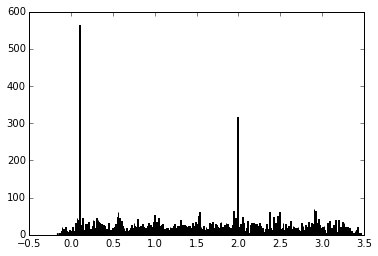

In [14]:
m = np.asarray(matches)
h = np.histogram(m, bins=np.arange(m.min(), m.max(), 0.01))
print(h[1][np.argmax(h[0])])
hh = plt.hist(m, bins=np.arange(m.min(), m.max(), 0.01))

In [ ]:
x = [(1, 2, 3), (2, 3, 9999), (3, 0, 0)]
max(x)